Question: Predict the `capacity_mw'(number) and 'primary_fuel'(text)



There are two labels:`capacity_mw'(number) and  'primary_fuel'(text)

Others are features

We would be performing both regression and classification seperately.

# Understanding the data and EDA

In [153]:
#importing the necessary libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

#importing numpy and panda
import numpy as np
import pandas as pd

#librariers to build models and checking accuracy
import sklearn
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from statsmodels.formula.api import ols

#librariers to build models and checking accuracy
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#library to split data
from sklearn.model_selection import train_test_split

#library for EDA
from scipy.stats import zscore

#Library for saving data
import pickle

#library for GridSearchCV 
from sklearn.model_selection import GridSearchCV

#library for error detection in regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error

#libraries for regularisation
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

import warnings
warnings.filterwarnings('ignore')

In [154]:
df=pd.read_csv('database_IND.csv')
df.head(50)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.50,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.00,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.20,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.00,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.00,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.00,23.7689,68.6447,Coal,Oil,NaN,...,WRI,NaN,2018.0,821.798000,1153.421000,1208.852000,1175.765000,1147.913000,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.00,10.4547,77.0078,Hydro,NaN,NaN,...,WRI,NaN,2018.0,147.568450,157.558250,152.195200,61.421350,89.629600,Central Electricity Authority,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.00,32.2258,77.2070,Hydro,NaN,NaN,...,WRI,NaN,2018.0,696.738800,674.391100,721.335200,675.724400,679.594950,Central Electricity Authority,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.00,16.3300,75.8863,Hydro,NaN,NaN,...,WRI,NaN,2018.0,504.813250,480.594950,144.434200,402.029750,439.372100,Central Electricity Authority,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.00,23.1642,81.6373,Coal,Oil,NaN,...,WRI,NaN,2018.0,2642.322000,1887.904000,1643.046000,1338.093000,1563.457000,Central Electricity Authority,NaN


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

The database has 25 columns

Both categorical and numerical data are present

In [156]:
df.describe(include='all')

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
count,908,908,908,908,908.000000,862.000000,862.000000,908,199,1,...,889,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,450,0.0
unique,1,1,908,908,NaN,NaN,NaN,8,3,1,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
top,IND,India,Sumilon Shikarpur Wind Farm,IND0000066,NaN,NaN,NaN,Coal,Oil,Oil,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Central Electricity Authority,NaN
freq,908,908,1,1,NaN,NaN,NaN,259,196,1,...,766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,450,NaN
mean,NaN,NaN,NaN,NaN,321.046378,21.196189,77.447848,NaN,NaN,NaN,...,NaN,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN,NaN
std,NaN,NaN,NaN,NaN,580.221767,6.248627,4.907260,NaN,NaN,NaN,...,NaN,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,8.168900,68.644700,NaN,NaN,NaN,...,NaN,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,16.837500,16.771575,74.258975,NaN,NaN,NaN,...,NaN,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN,NaN
50%,NaN,NaN,NaN,NaN,60.000000,21.778300,76.719250,NaN,NaN,NaN,...,NaN,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN,NaN
75%,NaN,NaN,NaN,NaN,388.125000,25.516375,79.441475,NaN,NaN,NaN,...,NaN,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN,NaN


Observations

1.Number of rows/data present is 908

2.Large number of null values present

3.Only one unique value present in country,country_long,other_fuel2,generation_data_source, so will drop the columns

In [157]:
df=df.drop(columns=["country","country_long","other_fuel2","generation_data_source","other_fuel1"])

# finding numerical and categorical data

In [158]:
#finding numerical datas
df.select_dtypes(include=["number"]).columns

Index(['capacity_mw', 'latitude', 'longitude', 'other_fuel3',
       'commissioning_year', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017',
       'estimated_generation_gwh'],
      dtype='object')

In [159]:
#finding categorical datas
df.select_dtypes(exclude=["number"]).columns

Index(['name', 'gppd_idnr', 'primary_fuel', 'owner', 'source', 'url',
       'geolocation_source'],
      dtype='object')

In [160]:
cat=df[{'name', 'gppd_idnr', 'primary_fuel', 'owner', 'source', 'url','geolocation_source'}]
cat

,gppd_idnr,url,source,owner,primary_fuel,name,geolocation_source
0,WRI1020239,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,Solar Paces,Solar,ACME Solar Tower,National Renewable Energy Laboratory
1,WRI1019881,http://www.ultratechcement.com/,Ultratech Cement ltd,Ultratech Cement ltd,Coal,ADITYA CEMENT WORKS,WRI
2,WRI1026669,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,CDM,AES,Wind,AES Saurashtra Windfarms,WRI
3,IND0000001,http://www.cea.nic.in/,Central Electricity Authority,NaN,Gas,AGARTALA GT,WRI
4,IND0000002,http://www.cea.nic.in/,Central Electricity Authority,NaN,Coal,AKALTARA TPP,WRI
...,...,...,...,...,...,...,...
903,IND0000513,http://www.cea.nic.in/,Central Electricity Authority,NaN,Coal,YERMARUS TPP,WRI
904,WRI1026222,http://karnatakapower.com,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Solar,Yelesandra Solar Power Plant,Industry About
905,WRI1026776,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,CDM,NaN,Wind,Yelisirur wind power project,WRI
906,WRI1019901,http://www.hzlindia.com/,Hindustan Zinc ltd,Hindustan Zinc ltd,Coal,ZAWAR MINES,WRI


# EDA

In [161]:
#Checking null values
df.isnull().sum()

name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
estimated_generation_gwh    908
dtype: int64

In [162]:
#calculating percentage of null values
def missing_values(df, percentage):

    columns = df.columns
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})

    missing_drop = list(missing_value_df[missing_value_df.percent_missing>percentage].column_name)
    df = df.drop(missing_drop, axis=1)
    return missing_value_df

In [163]:
missing_values(df,80)


,column_name,percent_missing
name,name,0.000000
gppd_idnr,gppd_idnr,0.000000
capacity_mw,capacity_mw,0.000000
latitude,latitude,5.066079
longitude,longitude,5.066079
primary_fuel,primary_fuel,0.000000
other_fuel3,other_fuel3,100.000000
commissioning_year,commissioning_year,41.850220
owner,owner,62.334802
source,source,0.000000


1.Removing columns which have above 70% null values

In [164]:
df = df.drop(df.columns[df.apply(lambda col: col.isnull().sum()/len(df) > 0.70)], axis=1)

2.removing duplicate values


In [165]:
df.drop_duplicates(inplace=True)

3.Mean of columns which have numerical data and have null values

Numerical columns are capacity_mw', 'latitude', 'longitude', 'other_fuel3',
       , 'wepp_id', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017',
       'estimated_generation_gwh'

In it null values are there in latitude,longitude,generation_gwh_2013, generation_gwh_2014, generation_gwh_2015,generation_gwh_2016, generation_gwh_2017

dealing with these null values by replacing it with mean

In [166]:
df["latitude"].fillna(df["latitude"].mean(),inplace=True)
df["longitude"].fillna(df["longitude"].mean(),inplace=True)
df["generation_gwh_2013"].fillna(df["generation_gwh_2013"].mean(),inplace=True)
df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].mean(),inplace=True)
df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].mean(),inplace=True)
df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].mean(),inplace=True)
df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].mean(),inplace=True)

4.Mode of columns with categorical datas

In [167]:
#df["other_fuel1"].fillna(df["other_fuel1"].mode()[0],inplace=True)
df["commissioning_year"].fillna(df["commissioning_year"].mode()[0],inplace=True)
df["owner"].fillna(df["owner"].mode()[0],inplace=True)
df["geolocation_source"].fillna(df["geolocation_source"].mode()[0],inplace=True)
df["year_of_capacity_data"].fillna(df["year_of_capacity_data"].mode()[0],inplace=True)

In [168]:
#Checking null values
df.isnull().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
owner                    0
source                   0
url                      0
geolocation_source       0
year_of_capacity_data    0
generation_gwh_2013      0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
dtype: int64

# Analysing data

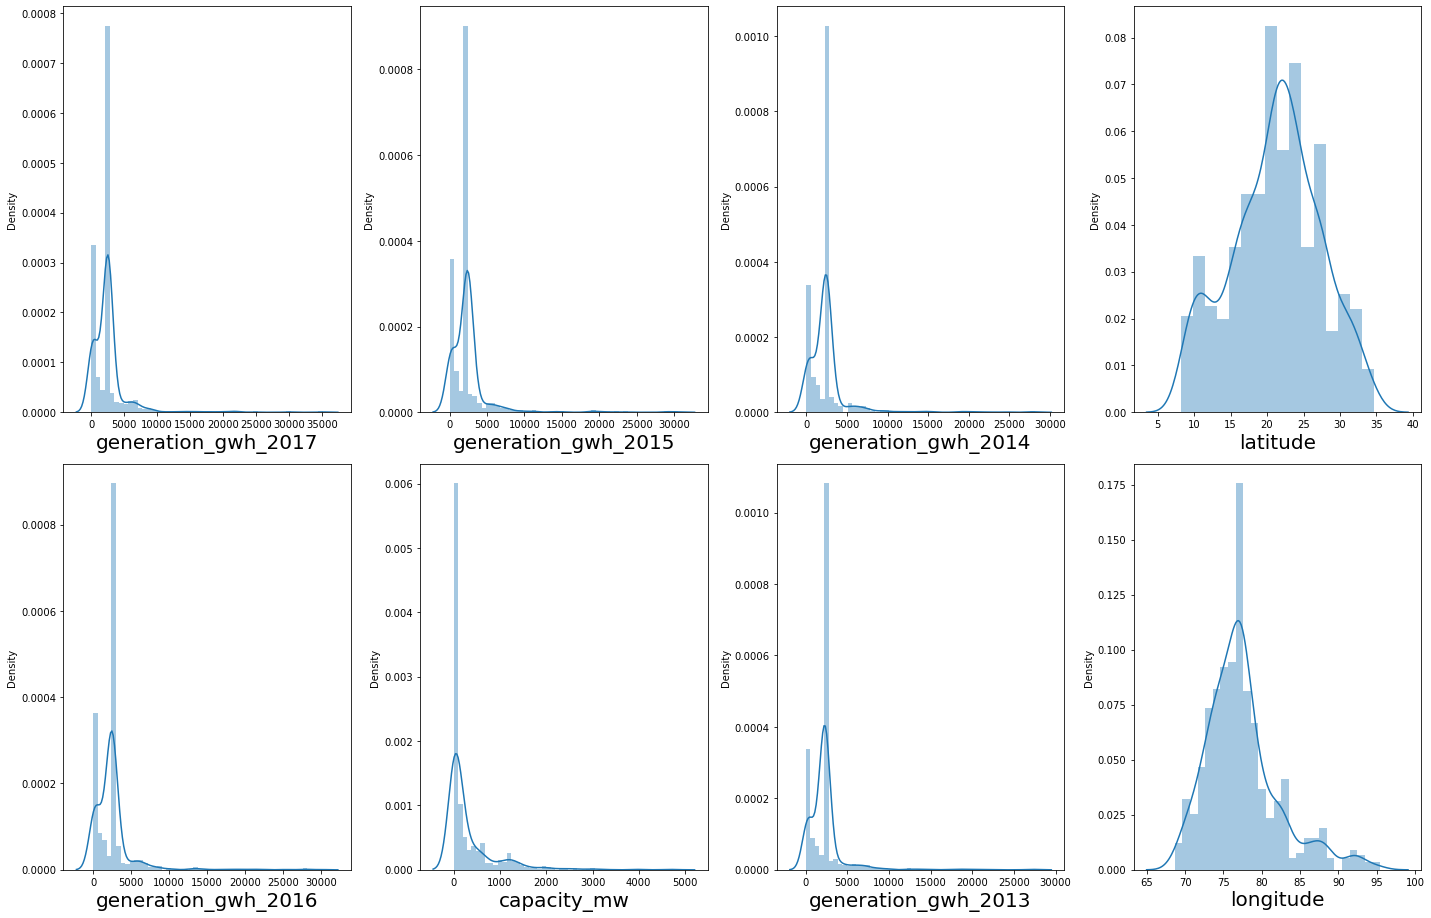

In [169]:
#numerical data
num=df[{'capacity_mw','latitude','longitude','generation_gwh_2013', 'generation_gwh_2014','generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'}]


#understanding numerical data
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in num:
    if plotnumber<=16:
       ax=plt.subplot(4,4,plotnumber)
       sns.distplot(num[column])         #distribution plot- we use for continous data
       plt.xlabel(column,fontsize=20)

    plotnumber+=1
plt.tight_layout()

Observations:

Highest value:

1.longitude is 78 and latitude is 22

2.generation_gwh_2017 is 3000,generation_gwh_2014 is 2200,generation_gwh_2013 is 2200,generation_gwh_2015 is 2200, generation_gwh_2016 is 2200

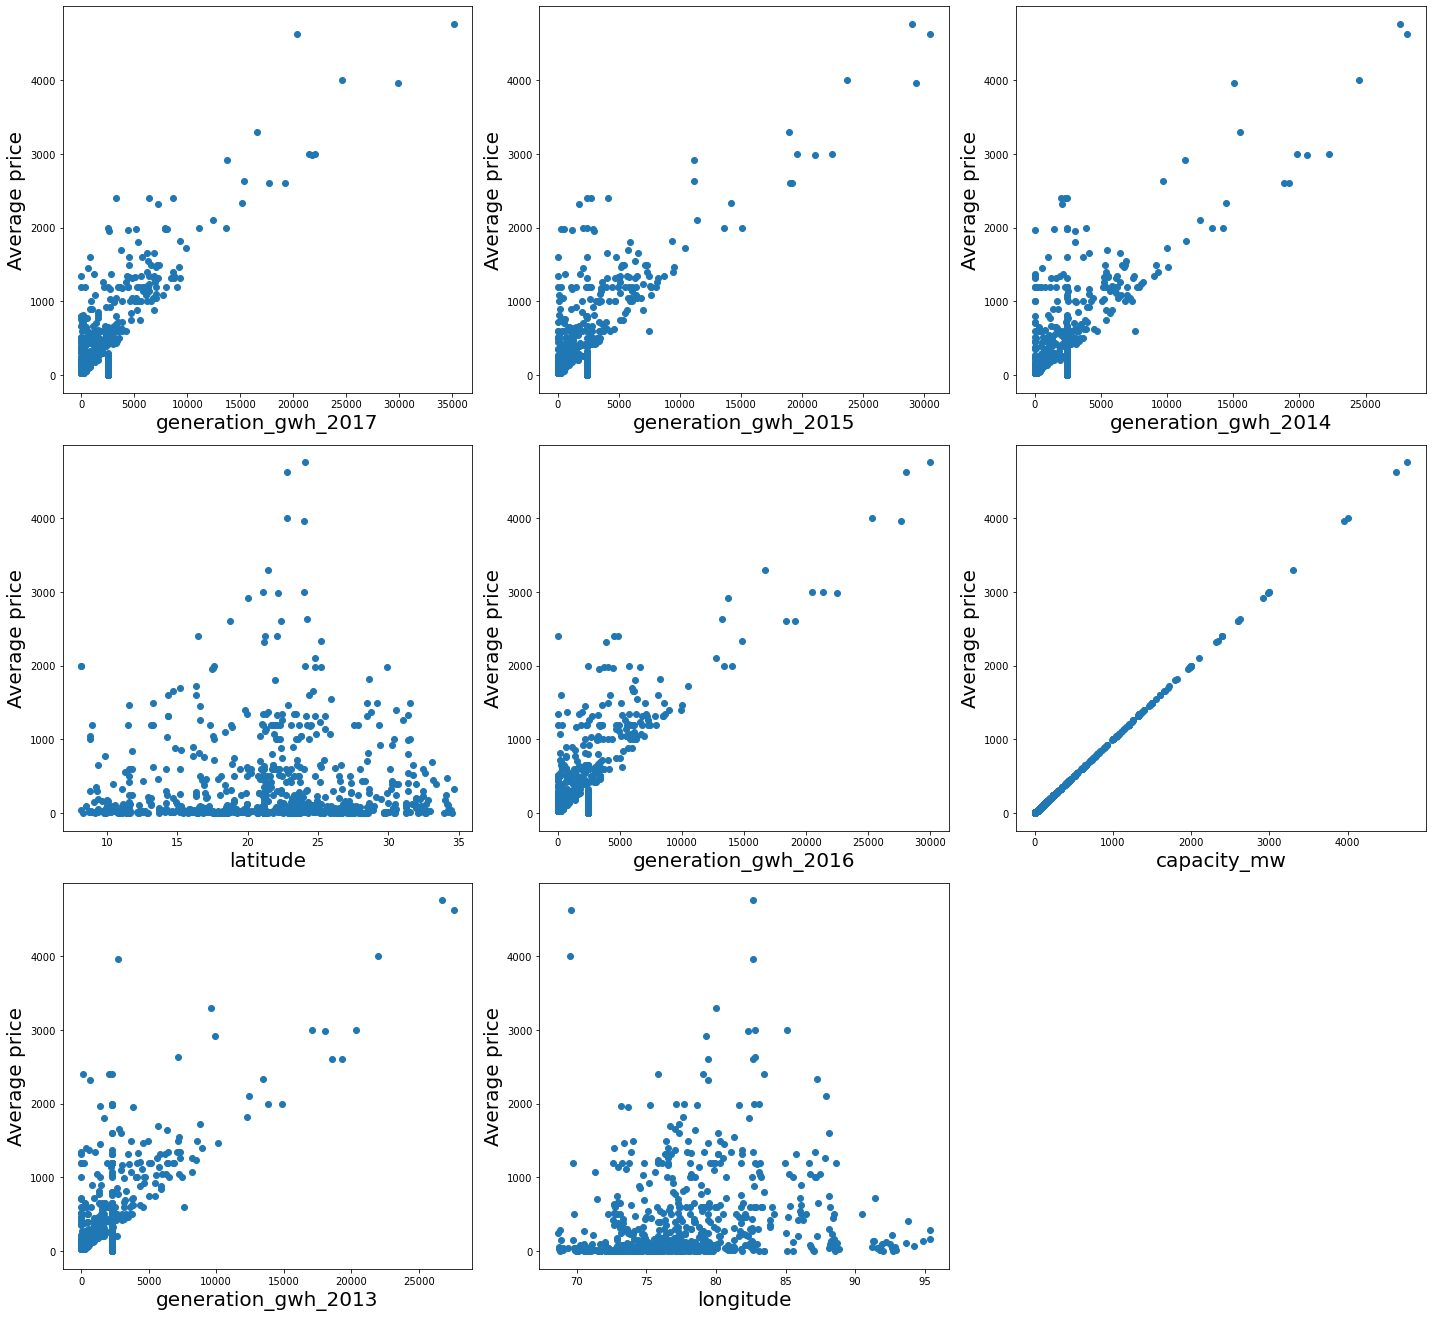

In [170]:
#Analysing the relationship between numerical features and capacity_mw

y_table=df['capacity_mw']

#visualising the relationship- scatter plot 
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in num:
    if plotnumber<=15:
        X=plt.subplot(5,3,plotnumber)
        plt.scatter(num[column],y_table)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Average price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

Most of the latitude between 70 and 87 degree are having capacity between 0 and 1000MW

Most of the latitude between 70 and 87 degree are having capacity between 0 and 1000MW

The capacity increases as generation_gwh_2017 increases. The 2013,2014,2015 and 2016 is similar to this

# dealing outliers on numerical data

In [171]:
#finding numerical datas
df.select_dtypes(include=["number"]).columns

Index(['capacity_mw', 'latitude', 'longitude', 'commissioning_year',
       'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

In [172]:
num=df[{'capacity_mw','latitude','longitude','generation_gwh_2013', 'generation_gwh_2014','generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'}]
num

,generation_gwh_2017,generation_gwh_2015,generation_gwh_2014,latitude,generation_gwh_2016,capacity_mw,generation_gwh_2013,longitude
0,2531.754458,2414.072373,2420.393316,28.1839,2453.936292,2.5,2304.059202,73.2407
1,2531.754458,2414.072373,2420.393316,24.7663,2453.936292,98.0,2304.059202,74.6090
2,2531.754458,2414.072373,2420.393316,21.9038,2453.936292,39.2,2304.059202,69.3732
3,663.774500,843.747000,617.789264,23.8712,886.004428,135.0,631.777928,91.3602
4,5385.579736,5916.370000,3035.550000,21.9603,6243.000000,1800.0,1668.290000,82.4091
...,...,...,...,...,...,...,...,...
903,865.400000,0.994875,2420.393316,16.2949,233.596650,1600.0,2304.059202,77.3568
904,2531.754458,2414.072373,2420.393316,12.8932,2453.936292,3.0,2304.059202,78.1654
905,2531.754458,2414.072373,2420.393316,15.2758,2453.936292,25.5,2304.059202,75.5811
906,2531.754458,2414.072373,2420.393316,24.3500,2453.936292,80.0,2304.059202,73.7477


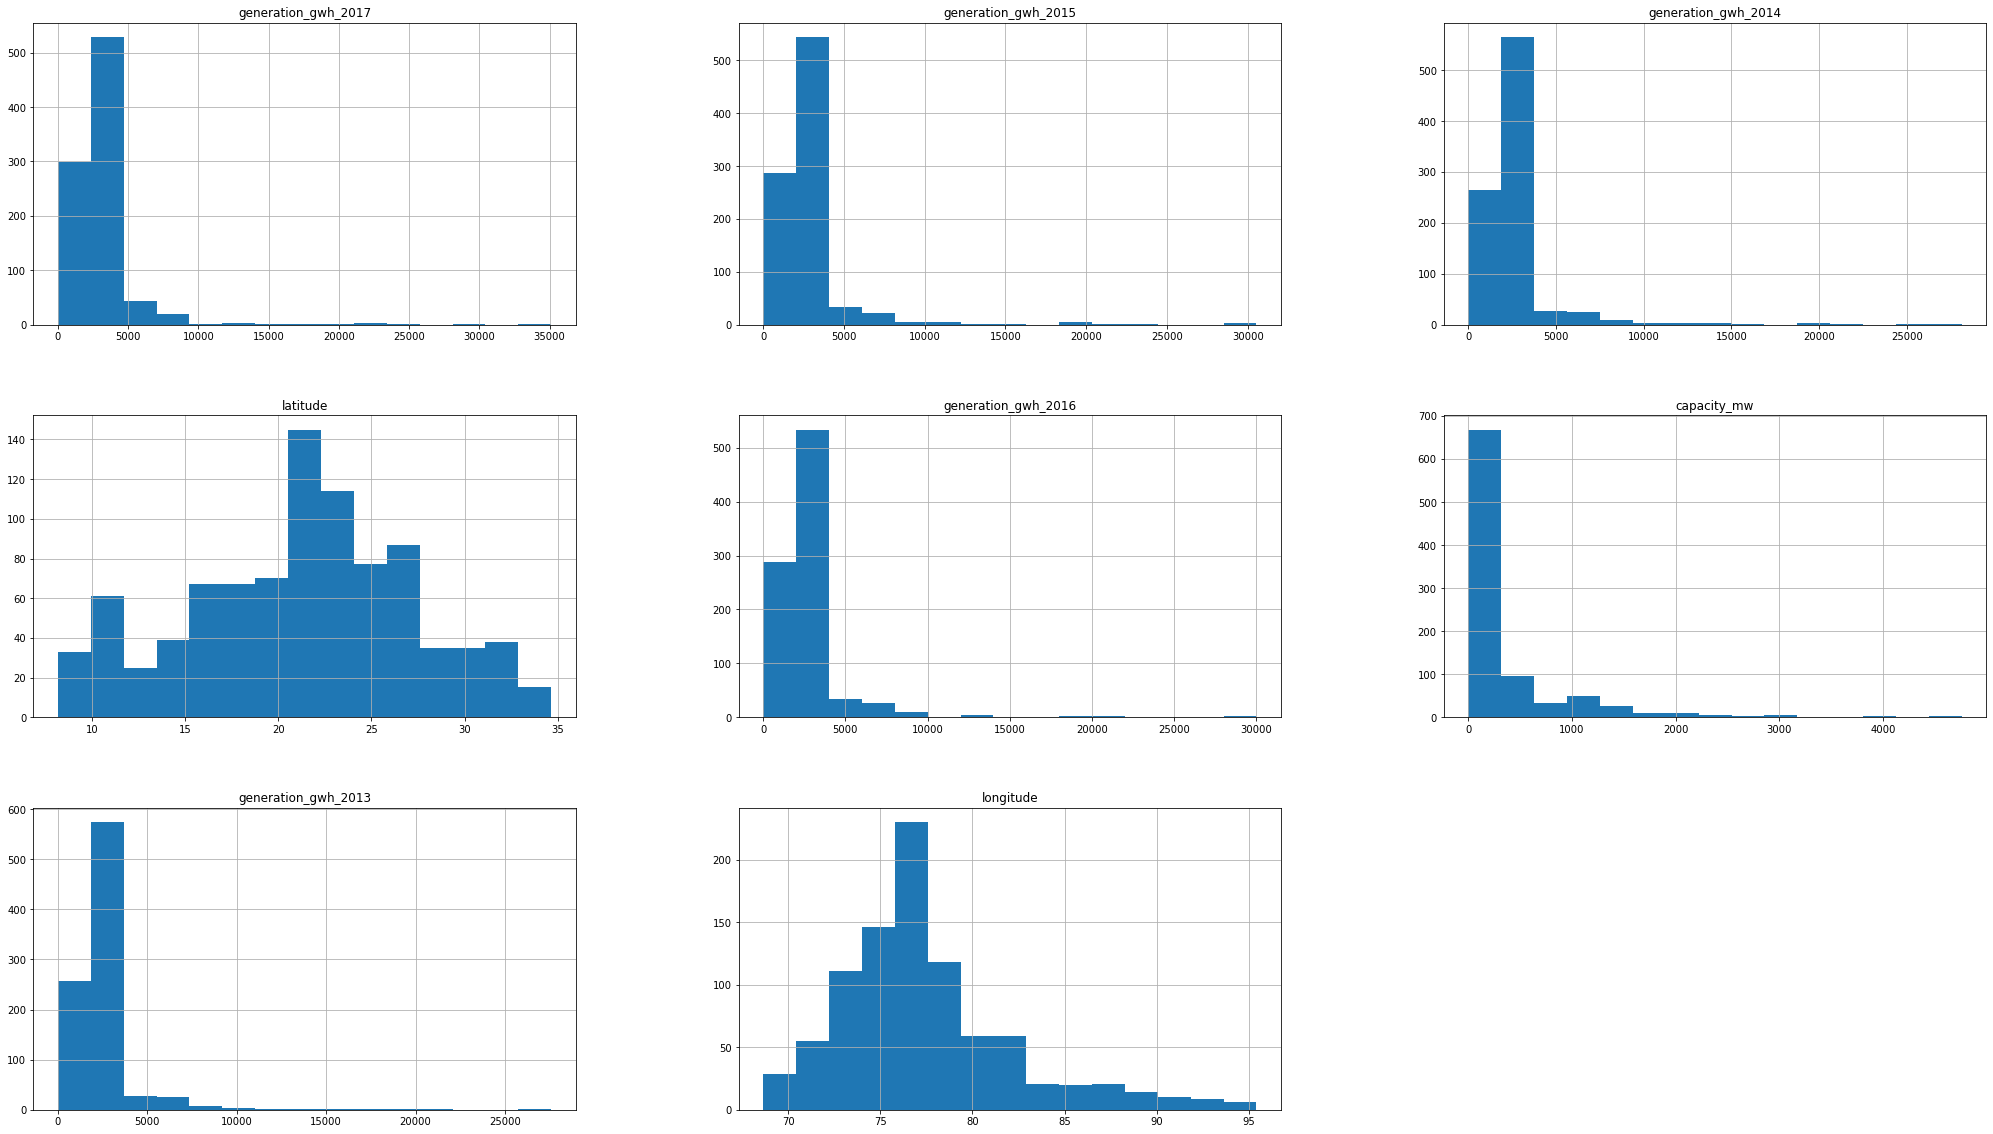

In [173]:
num.hist(figsize=(35,20),bins = 15)
plt.title("Features Distribution")
plt.show()

There is outliers present in  as well as skewness in generation_gwh2017,2016,2014,2013 and 2015 which needs to be removed

In [174]:
#Using zscore
import numpy as np
from scipy.stats import zscore

z=np.abs(zscore(num))
threshold=3
df_new=df[(z<3).all(axis=1)]

print("columns before applying zscore: ",len(df))
print("columns after applying zscore: ",len(df_new))

columns before applying zscore:  908
columns after applying zscore:  867


In [175]:
df_new

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,2013.0,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,2013.0,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,2304.059202,2420.393316,0.994875,233.596650,865.400000
904,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,2013.0,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
905,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,2013.0,Acc Acc ltd,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
906,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,2013.0,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


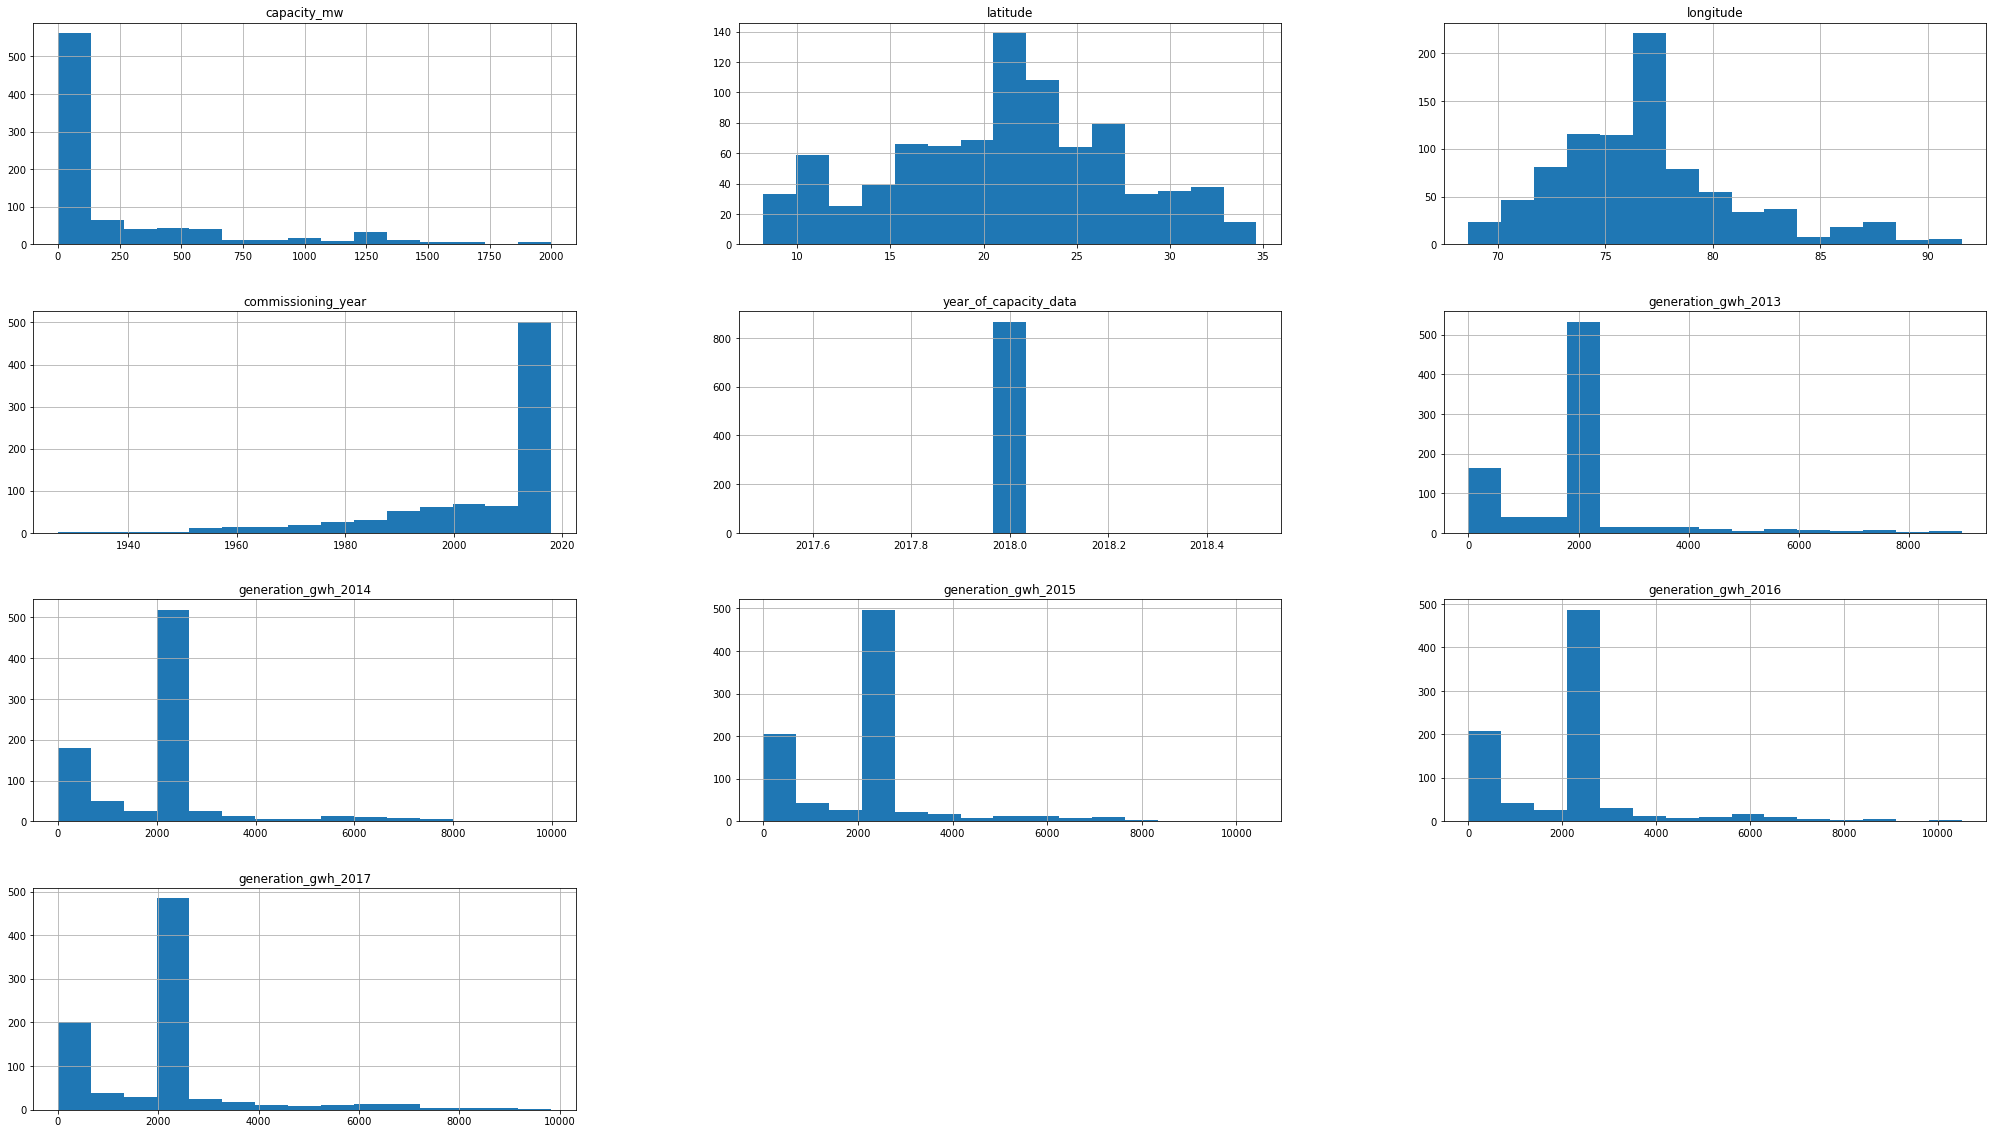

In [176]:
df_new.hist(figsize=(35,20),bins = 15)
plt.title("Features Distribution")
plt.show()

skewness is still present hence will remove it

In [177]:
df_new.skew()

capacity_mw              2.017835
latitude                -0.103418
longitude                0.864288
commissioning_year      -1.823597
year_of_capacity_data    0.000000
generation_gwh_2013      1.529639
generation_gwh_2014      1.441757
generation_gwh_2015      1.328513
generation_gwh_2016      1.354065
generation_gwh_2017      1.250408
dtype: float64

In [178]:
#removing skewness using log1p
num=df_new[{'capacity_mw','latitude','longitude','generation_gwh_2013', 'generation_gwh_2014','generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'}]

for col in num:
    if num.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [179]:
df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,ACME Solar Tower,WRI1020239,1.252763,28.1839,4.307313,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2018.0,7.742862,7.792098,7.789485,7.805856,7.837063
1,ADITYA CEMENT WORKS,WRI1019881,4.595120,24.7663,4.325575,Coal,2013.0,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2018.0,7.742862,7.792098,7.789485,7.805856,7.837063
2,AES Saurashtra Windfarms,WRI1026669,3.693867,21.9038,4.253813,Wind,2013.0,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2018.0,7.742862,7.792098,7.789485,7.805856,7.837063
3,AGARTALA GT,IND0000001,4.912655,23.8712,4.525696,Gas,2004.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,6.450120,6.427765,6.739037,6.787850,6.499448
4,AKALTARA TPP,IND0000002,7.496097,21.9603,4.423757,Coal,2015.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,7.420154,8.018477,8.685647,8.739376,8.591666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,YERMARUS TPP,IND0000513,7.378384,16.2949,4.361273,Coal,2016.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,7.742862,7.792098,0.690581,5.457868,6.764347
904,Yelesandra Solar Power Plant,WRI1026222,1.386294,12.8932,4.371539,Solar,2013.0,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,2018.0,7.742862,7.792098,7.789485,7.805856,7.837063
905,Yelisirur wind power project,WRI1026776,3.277145,15.2758,4.338350,Wind,2013.0,Acc Acc ltd,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,2018.0,7.742862,7.792098,7.789485,7.805856,7.837063
906,ZAWAR MINES,WRI1019901,4.394449,24.3500,4.314118,Coal,2013.0,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,2018.0,7.742862,7.792098,7.789485,7.805856,7.837063


# Regression for predicting capacity_mw

In [180]:
#understanding the relationship between independent variable with label
data_corr=df.corr()
data_corr["capacity_mw"].sort_values(ascending=False)

capacity_mw              1.000000
longitude                0.311277
latitude                 0.063157
generation_gwh_2016     -0.038057
generation_gwh_2013     -0.048017
generation_gwh_2017     -0.051759
generation_gwh_2014     -0.054577
generation_gwh_2015     -0.055518
commissioning_year      -0.108333
year_of_capacity_data         NaN
Name: capacity_mw, dtype: float64

gppd_idnr,generation_gwh_2014,generation_gwh_2013,generation_gwh_2015 and generation_gwh_2016 has high multicollinearity

df.drop(columns=["generation_gwh_2016","generation_gwh_2014"],inplace=True)



In [181]:
#one hot encoding on data
df=pd.get_dummies(df)
df

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,...,url_https://www.iaea.org/PRIS/CountryStatistics/ReactorDetails.aspx?current=853,url_https://www.iocl.com,url_https://www.jaibalajigroup.com/power.html,url_https://www.kesocorp.com/,url_https://www.solairedirect.com,url_https://www.vardhman.com/,url_https://www.zaubacorp.com/company/MAHATMA-SUGAR-POWER-LIMITED/U15421MH1997PLC111855,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
0,1.252763,28.1839,4.307313,2011.0,2018.0,7.742862,7.792098,7.789485,7.805856,7.837063,...,0,0,0,0,0,0,0,0,1,0
1,4.595120,24.7663,4.325575,2013.0,2018.0,7.742862,7.792098,7.789485,7.805856,7.837063,...,0,0,0,0,0,0,0,0,0,1
2,3.693867,21.9038,4.253813,2013.0,2018.0,7.742862,7.792098,7.789485,7.805856,7.837063,...,0,0,0,0,0,0,0,0,0,1
3,4.912655,23.8712,4.525696,2004.0,2018.0,6.450120,6.427765,6.739037,6.787850,6.499448,...,0,0,0,0,0,0,0,0,0,1
4,7.496097,21.9603,4.423757,2015.0,2018.0,7.420154,8.018477,8.685647,8.739376,8.591666,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,7.378384,16.2949,4.361273,2016.0,2018.0,7.742862,7.792098,0.690581,5.457868,6.764347,...,0,0,0,0,0,0,0,0,0,1
904,1.386294,12.8932,4.371539,2013.0,2018.0,7.742862,7.792098,7.789485,7.805856,7.837063,...,0,0,0,0,0,0,0,1,0,0
905,3.277145,15.2758,4.338350,2013.0,2018.0,7.742862,7.792098,7.789485,7.805856,7.837063,...,0,0,0,0,0,0,0,0,0,1
906,4.394449,24.3500,4.314118,2013.0,2018.0,7.742862,7.792098,7.789485,7.805856,7.837063,...,0,0,0,0,0,0,0,0,0,1


In [182]:
x=df.drop(columns=["capacity_mw"])
y=df['capacity_mw']

In [183]:
#standardising the data for PCA
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaledX=scaler.fit_transform(df)

scaledX

array([[-1.6340626 ,  1.1483961 , -0.9010043 , ..., -0.38836044,
        15.03329638, -2.52628459],
       [ 0.16015781,  0.58673028, -0.59249618, ..., -0.38836044,
        -0.06651901,  0.39583822],
       [-0.32364638,  0.11629242, -1.8047639 , ..., -0.38836044,
        -0.06651901,  0.39583822],
       ...,
       [-0.54734828, -0.97298691, -0.37669217, ..., -0.38836044,
        -0.06651901,  0.39583822],
       [ 0.05243519,  0.51831341, -0.78603384, ..., -0.38836044,
        -0.06651901,  0.39583822],
       [-0.77009551, -1.85081984,  0.03638046, ..., -0.38836044,
        -0.06651901,  0.39583822]])

In [184]:
#PCA
from sklearn.decomposition import PCA

testpca=PCA()
Y=testpca.fit(scaledX)

var_cumu=np.cumsum(Y.explained_variance_ratio_)*100

var_cumu

array([  0.39379694,   0.67367717,   0.90628495,   1.13328185,
         1.35316668,   1.5640445 ,   1.76414639,   1.96209581,
         2.15738895,   2.35235866,   2.54456885,   2.73665691,
         2.92861986,   3.12057712,   3.31253357,   3.5044868 ,
         3.69642955,   3.88836648,   4.08029424,   4.27219889,
         4.46410184,   4.65599373,   4.84787592,   5.03975329,
         5.23162985,   5.42348853,   5.61534107,   5.80717668,
         5.99901228,   6.19084788,   6.38268349,   6.57451909,
         6.76635388,   6.95818729,   7.15001669,   7.34184285,
         7.53366833,   7.72548573,   7.91729887,   8.10909914,
         8.30089205,   8.49267926,   8.68446053,   8.87621466,
         9.06796562,   9.25971592,   9.45146595,   9.64321298,
         9.83495863,  10.02669674,  10.21840538,  10.41011403,
        10.60182267,  10.79353131,  10.98523996,  11.1769486 ,
        11.36865724,  11.56036589,  11.75207453,  11.94378317,
        12.13549182,  12.32720046,  12.5189091 ,  12.71

In [185]:
# PCs explaines 95% of the variance?
k=np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: ",k)

Number of components explaining 95% variance:  841


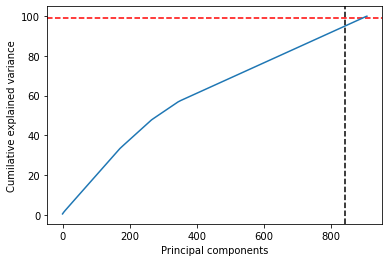

In [186]:
plt.ylabel('Cumilative explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k,color='k',linestyle='--')
plt.axhline(y=99,color='r',linestyle='--')

plt.plot(var_cumu)
plt.show()

In [187]:
# Creating final dataset with 800 columns

FinalPCA=PCA(n_components=802)
FinalData=FinalPCA.fit_transform(scaledX)

FinalData2=pd.DataFrame(FinalData)
FinalData2

,0,1,2,3,4,5,6,7,8,9,...,792,793,794,795,796,797,798,799,800,801
0,5.881797,3.215648,-0.307750,5.659988,32.093315,-1.258731,-0.646261,1.130102,-0.792688,-1.479646,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
1,1.369554,-2.514439,-0.197532,5.894985,-1.310413,1.926481,0.206614,-0.642820,-1.336944,-0.466446,...,1.087872e+00,3.076204e+00,-6.296198e-01,-1.036682e-02,-7.845905e-02,-7.432085e-01,-3.351397e-01,9.904955e-01,-5.496794e-01,-3.641026e-01
2,2.531264,-4.360166,-4.168397,-3.030491,0.508155,-0.876724,-0.150693,-1.252920,0.029304,0.212350,...,2.104541e-15,-7.616105e-16,9.881289e-17,-1.697791e-15,3.590527e-15,-1.363445e-15,-4.525313e-15,4.559839e-15,-4.225840e-15,5.247485e-15
3,-2.652811,0.916086,0.142703,0.088031,-0.057217,-0.227725,0.916583,0.560425,0.718668,-0.108173,...,7.859165e-01,2.655608e+00,-1.161141e+00,1.225310e+00,-1.821484e+00,1.761876e+00,1.014338e+00,-3.770154e-01,1.072550e+00,-1.534215e+00
4,-1.524219,-0.460806,-0.186335,2.561195,-0.489501,-0.416871,-0.451333,-0.023129,0.650960,0.867424,...,9.565567e-01,1.947957e+00,1.495791e+00,2.452625e-01,-1.045367e+00,2.315087e+00,-6.737818e-01,1.816545e+00,-7.338350e-01,-1.034402e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,-2.702125,0.580182,0.040253,0.490421,-0.105244,0.069757,-0.087528,0.144367,-0.404489,0.165543,...,5.741908e-01,2.027612e+00,-1.751194e+00,8.061413e-01,1.395714e-01,-9.207065e-01,2.132570e-01,-2.692593e-01,9.247937e-01,3.162978e-01
904,6.125840,3.814593,0.331643,-1.564547,-1.337001,-0.217725,-0.795502,11.024501,-6.646023,0.688894,...,-7.691578e-01,-8.681857e-01,1.030887e+00,-2.120693e-01,1.081795e+00,6.727502e-01,1.609510e-01,-2.660489e+00,-1.154497e-01,1.087868e+00
905,1.165034,-3.213803,-2.885018,-1.974073,0.165245,-0.931805,-0.461880,0.057084,0.226898,0.254327,...,3.513347e-16,6.971220e-15,-3.873928e-15,5.621355e-15,-4.197525e-15,3.698260e-15,3.189749e-15,-1.423830e-15,2.514817e-15,-5.243440e-15
906,1.434634,-2.487952,-0.310273,6.110067,-1.162307,2.120305,1.043883,-5.203905,-1.473423,3.156885,...,-1.445230e+00,-1.630962e-01,-1.366246e+00,-3.667352e-01,-1.866778e+00,-3.105202e-01,-1.251336e+00,3.403769e-01,6.701163e-01,-7.934332e-01


In [188]:
df_new=FinalData2

# Train test split

In [189]:
#splitting the data into train and test
x=df_new
y=df['capacity_mw']

x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [190]:
y_train.head()

349    4.795791
866    4.110874
586    5.398163
329    3.128513
663    2.397895
Name: capacity_mw, dtype: float64

# Finding best random state

In [191]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train, x_test,y_train, y_test=train_test_split(x,y,test_size=.25,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    r2=r2_score(y_test,predrf)
    if r2>maxAccu:
        maxr2=r2
        maxRS=i

print("Best r2 score is", maxr2,"on Random State",maxRS)

Best r2 score is 0.797019597572236 on Random State 199


In [192]:
x_train, x_test,y_train, y_test=train_test_split(x,y,test_size=.25,random_state=199)

In [193]:
#Linear Regression
from sklearn.linear_model import LinearRegression

LR=LinearRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print("r2 score of LinearRegression model is",r2_score(y_test,predlr))

r2 score of LinearRegression model is 0.797019597572236


In [194]:
#DecisionTreeClassifier

dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
predlr=dt.predict(x_test)
print("r2 score of DecisionTreeRegressor model is",r2_score(y_test,predlr))

r2 score of DecisionTreeRegressor model is 0.8753659027279409


In [195]:
#Random forest regressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predlr=rf.predict(x_test)
print("r2 score of RandomForestRegressor model is",r2_score(y_test,predlr))

r2 score of RandomForestRegressor model is 0.948487751605359


In [196]:
#cross validation
#Finding overfitting
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
import statsmodels.api

scr1=cross_val_score(LR,x,y,cv=5)
print("Cross validation score of Linear Regression model :", scr1.mean())

scr2=cross_val_score(dt,x,y,cv=5)
print("Cross validation score of Decision Tree model :", scr2.mean())

scr3=cross_val_score(rf,x,y,cv=5)
print("Cross validation score of Random Forest model :", scr3.mean())


Cross validation score of Linear Regression model : 0.8399593775857104
Cross validation score of Decision Tree model : 0.8650923138751292
Cross validation score of Random Forest model : 0.939480561112382


# reason for selection of model

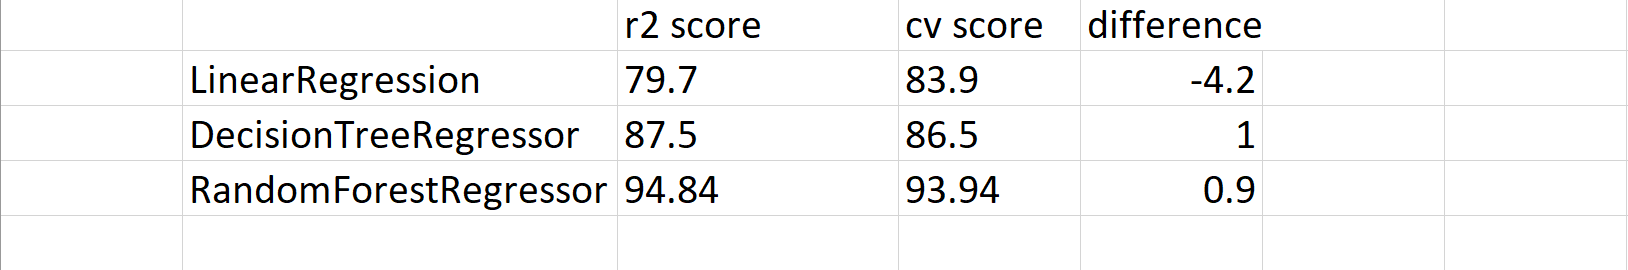

The difference is least in RandomForestRegressor

# Regularisation

In [197]:
lasscv=LassoCV(alphas=None, max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

#best alpha parameter
alpha=lasscv.alpha_

lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

lasso_reg.score(x_test,y_test)

0.9965774973639422

In [198]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

ridge_model.score(x_test,y_test)

0.7980252914059376

# hyperparameter tuning

In [247]:
#RandomForestRegressor
paramters={'n_estimators':[2,4,5,6,8],
           'min_samples_split':[2,3,4],
           'min_samples_leaf':[2,3,4],
           'max_leaf_nodes':[2,3,4],
           'max_features':['auto','sqrt','log2'],   
}

In [248]:
GCV=GridSearchCV(RandomForestRegressor(),paramters,cv=6)

In [249]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=6, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [2, 3, 4],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [2, 4, 5, 6, 8]})

In [250]:
GCV.best_params_

{'max_features': 'auto',
 'max_leaf_nodes': 4,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 8}

In [251]:
mod=RandomForestRegressor(n_estimators=8,max_leaf_nodes=4,min_samples_leaf=4,min_samples_split=2,max_features='auto')

In [252]:
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(r2_score(y_test,pred)*100)

83.19491974284097


In [253]:
randomforest=RandomForestRegressor()
randomforest.fit(x_train,y_train)

RandomForestRegressor()

# Saving of model

In [254]:
#saving RandomForestRegressor model
RandomForestRegressor_model=RandomForestRegressor()
RandomForestRegressor_model.fit(x_train,y_train)

filename='finalized_model.pickle'
pickle.dump(RandomForestRegressor_model,open(filename,'wb'))

In [255]:
#Adjusted R2
RandomForestRegressor_model.score(x_train,y_train)

0.9975780506876126

In [257]:
y_pred=RandomForestRegressor_model.predict(x_test)

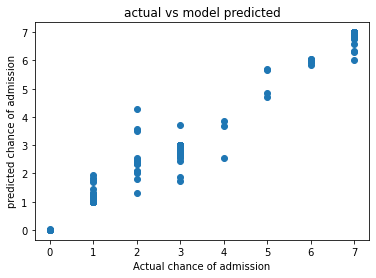

In [258]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual chance of admission')
plt.ylabel('predicted chance of admission')
plt.title('actual vs model predicted')
plt.show()

# Model evaluation

In [259]:
y_predict=RandomForestRegressor_model.predict(x_test)

In [260]:
mean_absolute_error(y_test,y_pred)

0.15336405529953914

The mean absolute error of the Random Forest Model is 15%

# Building classification model for fuel type

In [213]:
df=pd.read_csv('database_IND.csv')
df.head(50)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.50,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.00,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.20,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.00,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.00,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.00,23.7689,68.6447,Coal,Oil,NaN,...,WRI,NaN,2018.0,821.798000,1153.421000,1208.852000,1175.765000,1147.913000,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.00,10.4547,77.0078,Hydro,NaN,NaN,...,WRI,NaN,2018.0,147.568450,157.558250,152.195200,61.421350,89.629600,Central Electricity Authority,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.00,32.2258,77.2070,Hydro,NaN,NaN,...,WRI,NaN,2018.0,696.738800,674.391100,721.335200,675.724400,679.594950,Central Electricity Authority,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.00,16.3300,75.8863,Hydro,NaN,NaN,...,WRI,NaN,2018.0,504.813250,480.594950,144.434200,402.029750,439.372100,Central Electricity Authority,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.00,23.1642,81.6373,Coal,Oil,NaN,...,WRI,NaN,2018.0,2642.322000,1887.904000,1643.046000,1338.093000,1563.457000,Central Electricity Authority,NaN


In [214]:
#eda

df=df.drop(columns=["country","country_long","other_fuel2","generation_data_source","other_fuel1","url"])

#calculating percentage of null values
def missing_values(df, percentage):

    columns = df.columns
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})

    missing_drop = list(missing_value_df[missing_value_df.percent_missing>percentage].column_name)
    df = df.drop(missing_drop, axis=1)
    return missing_value_df

df = df.drop(df.columns[df.apply(lambda col: col.isnull().sum()/len(df) > 0.70)], axis=1)

df.drop_duplicates(inplace=True)

df["latitude"].fillna(df["latitude"].mean(),inplace=True)
df["longitude"].fillna(df["longitude"].mean(),inplace=True)
df["generation_gwh_2013"].fillna(df["generation_gwh_2013"].mean(),inplace=True)
df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].mean(),inplace=True)
df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].mean(),inplace=True)
df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].mean(),inplace=True)
df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].mean(),inplace=True)

#df["other_fuel1"].fillna(df["other_fuel1"].mode()[0],inplace=True)
df["commissioning_year"].fillna(df["commissioning_year"].mode()[0],inplace=True)
df["owner"].fillna(df["owner"].mode()[0],inplace=True)
df["geolocation_source"].fillna(df["geolocation_source"].mode()[0],inplace=True)
df["year_of_capacity_data"].fillna(df["year_of_capacity_data"].mode()[0],inplace=True)

num=df[{'capacity_mw','latitude','longitude','generation_gwh_2013', 'generation_gwh_2014','generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'}]

#Using zscore
import numpy as np
from scipy.stats import zscore

z=np.abs(zscore(num))
threshold=3
df_new=df[(z<3).all(axis=1)]

print("columns before applying zscore: ",len(df))
print("columns after applying zscore: ",len(df_new))

#removing skewness using log1p
num=df_new[{'capacity_mw','latitude','longitude','generation_gwh_2013', 'generation_gwh_2014','generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'}]

for col in num:
    if num.skew().loc[col]>0.55:
        df_new[col]=np.log1p(df_new[col])
        
df=df_new



columns before applying zscore:  908
columns after applying zscore:  867


In [215]:
df["primary_fuel"].value_counts()

Coal       237
Hydro      236
Solar      126
Wind       123
Gas         65
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

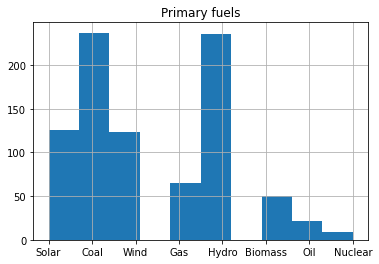

In [216]:
df["primary_fuel"].hist(grid=True)
plt.title("Primary fuels")
plt.show()

There is class imbalance

In [217]:
#label
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

#encoding the income column
df["primary_fuel"]=lab_enc.fit_transform(df['primary_fuel'])

y=df['primary_fuel']

In [218]:
x=df.drop(columns=["primary_fuel"])


#one hot encoding on data
df_encoded=pd.get_dummies(df)

In [219]:
#standardising the data for PCA
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaledX=scaler.fit_transform(df_encoded)

scaledX

array([[-1.63678909,  1.15214913, -0.91522265, ..., -0.39691736,
        14.68843082, -2.47114495],
       [ 0.21327991,  0.5967866 , -0.56924121, ..., -0.39691736,
        -0.06808079,  0.40467072],
       [-0.28558363,  0.13162823, -1.92875856, ..., -0.39691736,
        -0.06808079,  0.40467072],
       ...,
       [-0.51624868, -0.94542669, -0.32722428, ..., -0.39691736,
        -0.06808079,  0.40467072],
       [ 0.10220421,  0.52913754, -0.78628716, ..., -0.39691736,
        -0.06808079,  0.40467072],
       [-0.74592935, -1.81340815,  0.13602274, ..., -0.39691736,
        -0.06808079,  0.40467072]])

In [220]:
#PCA
from sklearn.decomposition import PCA

testpca=PCA()
Y=testpca.fit(scaledX)

var_cumu=np.cumsum(Y.explained_variance_ratio_)*100

var_cumu

array([  0.37918142,   0.6352948 ,   0.84929169,   1.0583923 ,
         1.255099  ,   1.44494579,   1.63064101,   1.81281607,
         1.99385999,   2.17479624,   2.35569221,   2.53653383,
         2.71737517,   2.89821587,   3.07905053,   3.25987374,
         3.44069026,   3.62149294,   3.80228823,   3.98306947,
         4.16383696,   4.3445946 ,   4.52533146,   4.70606831,
         4.88680509,   5.06754184,   5.24827859,   5.42901534,
         5.60975209,   5.79048884,   5.97122559,   6.15196234,
         6.33269909,   6.51343584,   6.69417259,   6.87490414,
         7.05563183,   7.23634905,   7.41705645,   7.59775799,
         7.77845623,   7.95913609,   8.13981202,   8.32044436,
         8.5010767 ,   8.68170903,   8.86234137,   9.04297371,
         9.22360605,   9.40423839,   9.58487072,   9.76550306,
         9.9461354 ,  10.12676774,  10.30740008,  10.48803242,
        10.66866475,  10.84929709,  11.02992943,  11.21056177,
        11.39119411,  11.57182644,  11.75245878,  11.93

In [221]:
# PCs explaines 95% of the variance?
k=np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: ",k)

Number of components explaining 95% variance:  810


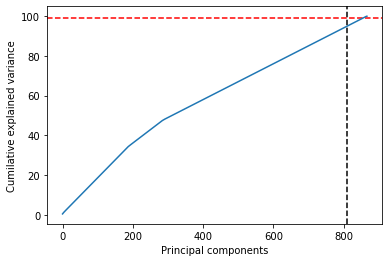

In [222]:
plt.ylabel('Cumilative explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k,color='k',linestyle='--')
plt.axhline(y=99,color='r',linestyle='--')

plt.plot(var_cumu)
plt.show()

In [223]:
# Creating final dataset with 810 columns

FinalPCA=PCA(n_components=810)
FinalData=FinalPCA.fit_transform(scaledX)

FinalData2=pd.DataFrame(FinalData)
FinalData2

,0,1,2,3,4,5,6,7,8,9,...,800,801,802,803,804,805,806,807,808,809
0,-4.808510,1.343070,28.593822,-4.967215,3.046727,1.726825,-0.075896,-0.824220,-0.010507,0.008967,...,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00
1,-1.081557,-3.021209,-0.544220,-2.156710,1.722201,-1.482322,-1.269409,4.548270,0.370834,-1.162398,...,-4.025459e-01,-9.791950e-01,-8.393841e-01,1.413696e-01,-7.695737e-01,1.095148e+00,4.827532e-01,-3.302283e-01,-1.254665e+00,1.455281e+00
2,-2.578436,-1.379580,0.831621,5.032673,-1.397905,-1.257118,-0.611995,0.395710,-0.008627,-0.017334,...,-2.568829e-15,1.477744e-15,-1.931175e-16,9.881741e-18,-7.148452e-15,2.597769e-15,-7.199413e-15,6.156466e-15,3.993071e-15,-2.709009e-15
3,2.507173,-0.021361,-0.258416,-1.259566,-0.968884,1.060635,-0.361389,-0.295283,-0.001705,0.005883,...,-1.291636e+00,-5.722121e-01,2.016015e+00,1.145531e+00,-2.150396e+00,-7.785333e-02,1.095068e+00,-3.586288e+00,-6.572215e-01,1.122537e+00
4,1.182742,-1.934986,-0.298674,-1.972924,-2.054980,0.443990,0.606418,-0.846823,-0.018463,0.013172,...,3.282958e-01,1.087939e+00,1.503472e+00,2.174930e+00,1.795342e+00,6.724772e-01,-1.669210e+00,-1.518776e+00,-3.210116e-01,-2.247135e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,2.910235,0.476217,-0.033167,-0.287681,0.132325,0.036322,0.497553,0.172006,0.010029,0.000235,...,-3.277782e+00,-7.524386e-01,-9.971546e-01,2.208617e-01,1.356896e+00,5.493049e-01,2.219510e+00,1.668454e+00,-6.182739e-01,-4.358320e+00
863,-5.025282,3.325937,-1.453829,0.843428,2.647726,8.546923,4.957787,-2.607554,0.451612,1.749044,...,2.007675e+00,1.088150e+00,2.423879e-01,-2.025805e+00,9.615822e-01,8.022820e-01,-7.954002e-02,1.919663e-01,1.716596e+00,2.324980e+00
864,-1.114707,-1.085983,0.355721,3.009482,-1.439755,0.292576,-0.168028,-0.289481,-0.009749,-0.000177,...,-1.791478e-01,-1.138890e+00,3.323729e-01,1.051144e+00,2.955197e-01,-2.586805e-01,7.081634e-01,-5.007437e-01,8.929670e-01,-3.375753e-01
865,-1.171381,-2.969454,-0.335995,-2.361464,1.037926,-5.546524,0.446103,6.511286,-0.538601,-3.224766,...,-6.656724e-01,-5.793887e-03,5.350981e-01,-7.575884e-01,1.472634e+00,-7.424987e-01,-8.168835e-01,-2.356193e-01,-9.621357e-01,-4.948785e-02


In [224]:
df=FinalData2

In [225]:
#splitting the data into train and test
x=df


x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [226]:
y_train.head()

797    3
525    1
79     3
133    6
88     3
Name: primary_fuel, dtype: int32

In [227]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train, x_test,y_train, y_test=train_test_split(x,y,test_size=.25,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print("Best accuracy is", maxAccu,"on Random State",maxRS)

Best accuracy is 0.7926267281105991 on Random State 129


In [228]:
x_train, x_test,y_train, y_test=train_test_split(x,y,test_size=.25,random_state=109)

In [229]:
#modelling

from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.7741935483870968
[[ 1  6  0  0  0  0  0  0]
 [ 0 45  1  8  0  0  0  0]
 [ 0  8  2  4  0  0  0  0]
 [ 0 13  1 56  0  0  0  0]
 [ 0  2  0  1  0  0  0  0]
 [ 0  2  0  2  0  0  0  0]
 [ 0  0  0  0  0  0 33  0]
 [ 0  0  0  1  0  0  0 31]]
              precision    recall  f1-score   support

           0       1.00      0.14      0.25         7
           1       0.59      0.83      0.69        54
           2       0.50      0.14      0.22        14
           3       0.78      0.80      0.79        70
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4
           6       1.00      1.00      1.00        33
           7       1.00      0.97      0.98        32

    accuracy                           0.77       217
   macro avg       0.61      0.49      0.49       217
weighted avg       0.76      0.77      0.75       217



In [230]:
#modelling
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)

print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.9078341013824884
[[ 7  0  0  0  0  0  0  0]
 [ 0 50  2  0  1  1  0  0]
 [ 0  2  7  4  0  1  0  0]
 [ 0  4  2 63  1  0  0  0]
 [ 0  0  0  0  2  1  0  0]
 [ 0  0  0  0  1  3  0  0]
 [ 0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0 32]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      0.93      0.91        54
           2       0.64      0.50      0.56        14
           3       0.94      0.90      0.92        70
           4       0.40      0.67      0.50         3
           5       0.50      0.75      0.60         4
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        32

    accuracy                           0.91       217
   macro avg       0.80      0.84      0.81       217
weighted avg       0.91      0.91      0.91       217



In [231]:
#modelling
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)

print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9216589861751152
[[ 7  0  0  0  0  0  0  0]
 [ 0 53  0  1  0  0  0  0]
 [ 0  5  3  6  0  0  0  0]
 [ 0  1  0 69  0  0  0  0]
 [ 0  0  0  2  0  0  1  0]
 [ 0  0  0  1  0  3  0  0]
 [ 0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0 32]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.90      0.98      0.94        54
           2       1.00      0.21      0.35        14
           3       0.87      0.99      0.93        70
           4       0.00      0.00      0.00         3
           5       1.00      0.75      0.86         4
           6       0.97      1.00      0.99        33
           7       1.00      1.00      1.00        32

    accuracy                           0.92       217
   macro avg       0.84      0.74      0.76       217
weighted avg       0.92      0.92      0.90       217



In [232]:
#modelling
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)

ad_pred=svc.predict(x_test)

print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.5622119815668203
[[ 0  1  0  0  0  0  6  0]
 [ 0 20  0 25  0  0  9  0]
 [ 0  1  0 11  0  0  2  0]
 [ 0  0  0 70  0  0  0  0]
 [ 0  1  0  2  0  0  0  0]
 [ 0  0  0  2  0  0  2  0]
 [ 0  1  0  0  0  0 32  0]
 [ 0 19  0 13  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.47      0.37      0.41        54
           2       0.00      0.00      0.00        14
           3       0.57      1.00      0.73        70
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4
           6       0.63      0.97      0.76        33
           7       0.00      0.00      0.00        32

    accuracy                           0.56       217
   macro avg       0.21      0.29      0.24       217
weighted avg       0.39      0.56      0.45       217



In [233]:
#Finding overfitting
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR,x,y,cv=5)
print("Cross validation score of Logistic Regression model :", scr.mean())

scr=cross_val_score(dt,x,y,cv=5)
print("Cross validation score of Decision Tree model :", scr.mean())

scr=cross_val_score(rf,x,y,cv=5)
print("Cross validation score of Random Forest model :", scr.mean())

scr=cross_val_score(svc,x,y,cv=5)
print("Cross validation score of SVC model :", scr.mean())

Cross validation score of Logistic Regression model : 0.7208557570925519
Cross validation score of Decision Tree model : 0.9146767656634112
Cross validation score of Random Forest model : 0.9088831306889908
Cross validation score of SVC model : 0.44519965450800614


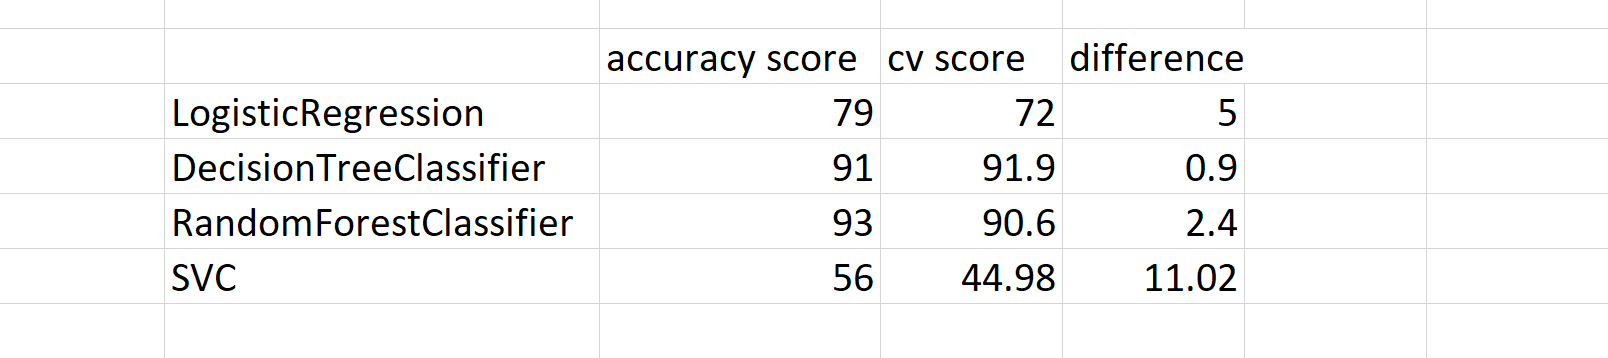

Least difference between accuracy score and cv score is for DecisionTreeClassifier, but since class is imbalanced we would use the model with highest ROC AUC score

# ROC AUC curve

ROC curves are typically used in binary classification to study the output of a classifier. Hence we will not be calculating it for this problem as this is a multilabel model

# Hyperparameter tuning

In [234]:
#Decision Tree CLassifier
paramters={'criterion':['gini', 'entropy'],
           'splitter':['best', 'random'],
           'min_samples_split':[2,3,4,5],
           'min_samples_leaf':[2,3,4,5,6],
           'max_leaf_nodes':[2,3,4,5,10],
}

In [235]:
GCV=GridSearchCV(DecisionTreeClassifier(),paramters,cv=5)

In [236]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [2, 3, 4, 5, 10],
                         'min_samples_leaf': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']})

In [237]:
GCV.best_params_

{'criterion': 'gini',
 'max_leaf_nodes': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'splitter': 'best'}

In [238]:
mod=DecisionTreeClassifier(criterion='gini',max_leaf_nodes=10,min_samples_leaf=4,min_samples_split=4,splitter='best')

In [239]:
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

90.32258064516128


In [240]:
classifier=DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

# Saving of model

In [241]:
filename='finalized_model1.pickle'
pickle.dump(classifier,open(filename,'wb'))

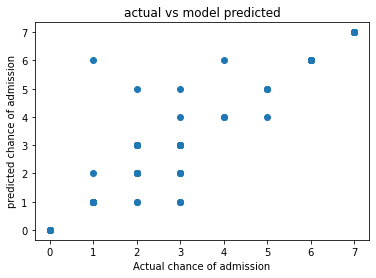

In [242]:
#Adjusted accuracy
classifier.score(x_train,y_train)
y_pred=classifier.predict(x_test)
plt.scatter(y_test,y_pred)

plt.xlabel('Actual chance of admission')
plt.ylabel('predicted chance of admission')
plt.title('actual vs model predicted')
plt.show()

In [243]:
print(confusion_matrix(y_test, y_pred))

[[ 7  0  0  0  0  0  0  0]
 [ 0 52  1  0  0  0  1  0]
 [ 0  2  5  6  0  1  0  0]
 [ 0  3  4 61  1  1  0  0]
 [ 0  0  0  0  2  0  1  0]
 [ 0  0  0  0  1  3  0  0]
 [ 0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0 32]]


In [244]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.91      0.96      0.94        54
           2       0.50      0.36      0.42        14
           3       0.91      0.87      0.89        70
           4       0.50      0.67      0.57         3
           5       0.60      0.75      0.67         4
           6       0.94      1.00      0.97        33
           7       1.00      1.00      1.00        32

    accuracy                           0.90       217
   macro avg       0.80      0.83      0.81       217
weighted avg       0.89      0.90      0.89       217



# Accuracy score of our model

In [245]:
scr=cross_val_score(classifier,x,y,cv=5)
print("Cross validation score of DecisionTreeClassifier :", scr.mean())

Cross validation score of DecisionTreeClassifier : 0.9031426483290147


In [246]:
classifier.fit(x_train,y_train)
pred=classifier.predict(x_test)
print("accuracy score of the DecisionTreeClassifier model is",accuracy_score(y_test,pred)*100)

accuracy score of the DecisionTreeClassifier model is 89.86175115207374
